In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-food-dataset/onlinefoods.csv


In [2]:
import pandas as pd 
df=pd.read_csv("/kaggle/input/online-food-dataset/onlinefoods.csv")

In [3]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [5]:
df['Gender']

0      Female
1      Female
2        Male
3      Female
4        Male
        ...  
383    Female
384    Female
385    Female
386      Male
387      Male
Name: Gender, Length: 388, dtype: object

In [6]:
df['Marital Status'].value_counts()

Marital Status
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [8]:
columns=df.columns

In [9]:

df['Occupation']=label.fit_transform(df['Occupation'])
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,3,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,3,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,3,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,3,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,3,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,3,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,3,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,3,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,3,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols)
df


,Age,Occupation,Family size,latitude,longitude,Pin code,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,...,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_No,Output_Yes,Feedback_Negative,Feedback_Positive,Unnamed: 12_No,Unnamed: 12_Yes
0,20,3,4,12.9766,77.5993,560001,True,False,False,False,...,False,True,False,False,False,True,False,True,False,True
1,24,3,3,12.9770,77.5773,560009,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
2,22,3,3,12.9551,77.6593,560017,False,True,False,False,...,False,True,False,False,False,True,True,False,False,True
3,22,3,6,12.9473,77.5616,560019,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
4,22,3,4,12.9850,77.5533,560010,False,True,False,False,...,False,True,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,3,2,12.9766,77.5993,560001,True,False,False,False,...,False,True,False,False,False,True,False,True,False,True
384,23,3,4,12.9854,77.7081,560048,True,False,False,False,...,False,True,False,False,False,True,False,True,False,True
385,22,3,5,12.9850,77.5533,560010,True,False,False,False,...,False,True,False,False,False,True,False,True,False,True
386,23,3,2,12.9770,77.5773,560009,False,True,False,False,...,False,True,False,False,False,True,False,True,False,True


<Axes: >

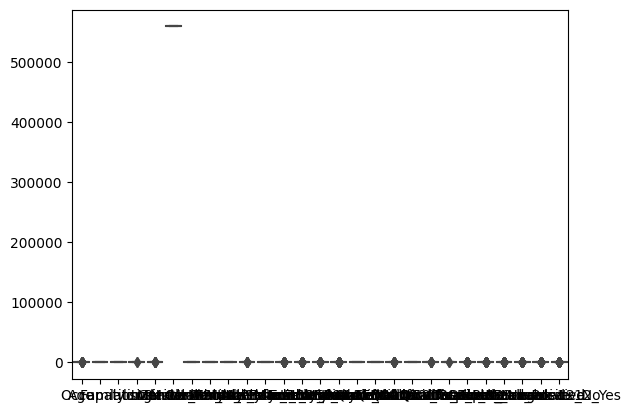

In [11]:
import seaborn as sns 
sns.boxplot(df)

In [12]:
y=df['Occupation']

In [13]:

x=df.drop(['Occupation'],axis=1)

In [14]:
y

0      3
1      3
2      3
3      3
4      3
      ..
383    3
384    3
385    3
386    3
387    3
Name: Occupation, Length: 388, dtype: int64

In [15]:
x

,Age,Family size,latitude,longitude,Pin code,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,...,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_No,Output_Yes,Feedback_Negative,Feedback_Positive,Unnamed: 12_No,Unnamed: 12_Yes
0,20,4,12.9766,77.5993,560001,True,False,False,False,True,...,False,True,False,False,False,True,False,True,False,True
1,24,3,12.9770,77.5773,560009,True,False,False,False,True,...,False,False,False,False,False,True,False,True,False,True
2,22,3,12.9551,77.6593,560017,False,True,False,False,True,...,False,True,False,False,False,True,True,False,False,True
3,22,6,12.9473,77.5616,560019,True,False,False,False,True,...,False,False,False,False,False,True,False,True,False,True
4,22,4,12.9850,77.5533,560010,False,True,False,False,True,...,False,True,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,2,12.9766,77.5993,560001,True,False,False,False,True,...,False,True,False,False,False,True,False,True,False,True
384,23,4,12.9854,77.7081,560048,True,False,False,False,True,...,False,True,False,False,False,True,False,True,False,True
385,22,5,12.9850,77.5533,560010,True,False,False,False,True,...,False,True,False,False,False,True,False,True,False,True
386,23,2,12.9770,77.5773,560009,False,True,False,False,True,...,False,True,False,False,False,True,False,True,False,True


In [16]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(x, y)

sorted_indices = np.argsort(mi_scores)[::-1]

for i in sorted_indices:
  print(f"{df.columns[i]}: {mi_scores[i]}")

Monthly Income_More than 50000: 0.4705850268331322
Age: 0.3253179226267693
Gender_Male: 0.2584496399376579
Marital Status_Prefer not to say: 0.24358791264902635
Monthly Income_10001 to 25000: 0.15570566630004357
Monthly Income_Below Rs.10000: 0.14813276913491435
latitude: 0.12426044368056899
longitude: 0.11718994569908059
Family size: 0.10599548664610658
Educational Qualifications_Post Graduate: 0.05776272595791432
Gender_Female: 0.0548176809155283
Feedback_Positive: 0.05235262105328653
Educational Qualifications_Graduate: 0.04999964240723842
Marital Status_Single: 0.049810121193874846
Educational Qualifications_Ph.D: 0.0366222105088696
Occupation: 0.03378379518692398
Output_No: 0.02706608917314779
Monthly Income_25001 to 50000: 0.026307548892923638
Pin code: 0.025598321793379286
Monthly Income_No Income: 0.02378158283237397
Educational Qualifications_Uneducated: 0.014665887086080964
Feedback_Negative : 0.013536321261207629
Marital Status_Married: 0.007458261091494167
Unnamed: 12_No: 0

<function matplotlib.pyplot.show(close=None, block=None)>

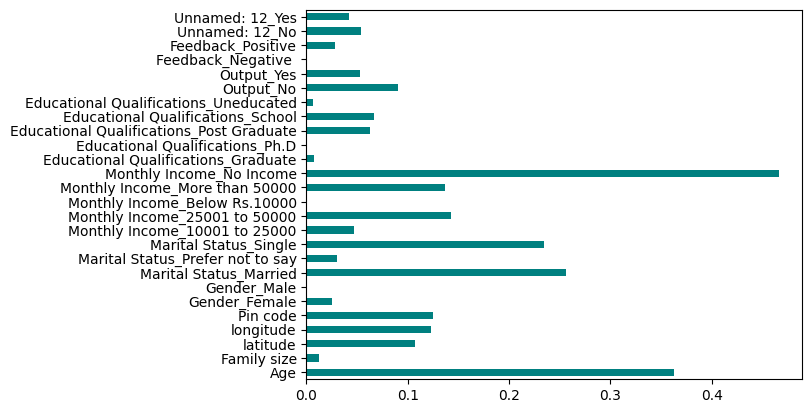

In [17]:
import matplotlib.pyplot as plt
importance=mutual_info_classif(x,y)
feat_imp=pd.Series(importance,x.columns[:])
feat_imp.plot(kind="barh",color="teal")
plt.show

In [18]:
# Assuming you have a DataFrame named df and the mutual information scores in a dictionary named mutual_info_scores
mutual_info_scores = {
    'Monthly Income_10001 to 25000': 0.49157250393602614,
    'Age': 0.30081796900927427,
    'Gender_Female': 0.2359393736070261,
    'longitude': 0.23263381892330148,
    'Marital Status_Single': 0.12940124824115307,
    'Marital Status_Married': 0.09819775136770126,
    'Gender_Male': 0.08929953574382954,
    'Educational Qualifications_Ph.D': 0.08436743736658947,
    'Monthly Income_No Income': 0.08324765262074618,
    'Output_No': 0.07494049111042234,
    'Family size': 0.07377298034500135,
    'Educational Qualifications_Post Graduate': 0.059667014269953134,
    'Pin code': 0.054613516484299796,
    'Educational Qualifications_Graduate': 0.05260383293333648,
    'Monthly Income_More than 50000': 0.04849268094730186,
    'Monthly Income_25001 to 50000': 0.04069527217380764,
    'latitude': 0.03643127922699274,
    'Monthly Income_Below Rs.10000': 0.013004385104133709,
    'Educational Qualifications_Uneducated': 0.0,
    'Marital Status_Prefer not to say': 0.0,
    'Educational Qualifications_School': 0.0,
    'Output_Yes': 0.0
}

mi_scores_df = pd.DataFrame(mutual_info_scores.items(), columns=['Column', 'MI Score'])

columns_to_drop = mi_scores_df[mi_scores_df['MI Score'] < 0.1]['Column'].tolist()
x.drop(columns=columns_to_drop, inplace=True)
x


,Age,longitude,Gender_Female,Marital Status_Single,Monthly Income_10001 to 25000,Feedback_Negative,Feedback_Positive,Unnamed: 12_No,Unnamed: 12_Yes
0,20,77.5993,True,True,False,False,True,False,True
1,24,77.5773,True,True,False,False,True,False,True
2,22,77.6593,False,True,False,True,False,False,True
3,22,77.5616,True,True,False,False,True,False,True
4,22,77.5533,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
383,23,77.5993,True,True,False,False,True,False,True
384,23,77.7081,True,True,False,False,True,False,True
385,22,77.5533,True,True,False,False,True,False,True
386,23,77.5773,False,True,False,False,True,False,True


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

### SVM

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,train_test_split
s=SVC()
parameter={'C':[0.1,10,100,0.01],"kernel":['rbf','linear','poly'],'gamma':['scale','auto']}
g=GridSearchCV(s,parameter,cv=4)

In [21]:
g.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 0.01], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']})

In [22]:
g.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

In [23]:
y_pred=d=g.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7628205128205128


### KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(3)

In [26]:
k.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred2=d=k.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred2))

0.7115384615384616


In [29]:
import warnings
warnings.filterwarnings("ignore")

### Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred3=model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.7115384615384616

### Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

In [34]:
dt=DecisionTreeClassifier()
param = {
    'max_depth': [None, 5, 10, 15],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],    # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']             # Function to measure the quality of a split
}
gt=GridSearchCV(dt,param,cv=5,scoring='accuracy')

In [35]:
gt.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [36]:
para=gt.best_params_
para

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [37]:
dt1=DecisionTreeClassifier(**para)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2')

In [38]:
y_pred4=dt1.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred4)

0.7756410256410257

## Random Forest 

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],              # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']             # Function to measure the quality of a split
}
g2=GridSearchCV(rf,param_grid,cv=2)

In [41]:
# g2.fit(x_train,y_train)

In [42]:
# para2=g2.best_params_
# para2

In [43]:
# rf1=RandomForestClassifier(**para2)

In [44]:
# rf1.fit(x_train,y_train)

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],        
    'learning_rate': [0.1, 0.5, 1.0] }      

ada_classifier = AdaBoostClassifier()

grid_search = GridSearchCV(ada_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)  

best_params = grid_search.best_params_

best_ada_classifier = AdaBoostClassifier(**best_params)

best_ada_classifier.fit(x_train, y_train) 

AdaBoostClassifier()

In [46]:
y_pred6=best_ada_classifier.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred6)

0.6987179487179487